<a href="https://colab.research.google.com/github/tauseefhashmi/TrafficSignClassification/blob/main/Analytics_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EfficientNetB0

###Import the Libraries and Functions.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!pip install keras
!pip install tensorflow
!pip install pandas 
!pip install sklearn 
!pip install matplotlib

In [24]:
import os 
import zipfile
import tensorflow
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from zipfile import *
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Unzip the Dataset zip File in Google Drive and Load the Data.

In [ ]:
!unzip -q /content/drive/MyDrive/GoogleCollabWork/Traffic.zip -d /content/drive/MyDrive/GoogleCollabWork/Traffic1  #unzip data in tmp/

### TIME CONSUMING PROCESSING OF IMAGES AND LABELLING THEM

In [2]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
input_path = '/content/drive/MyDrive/GoogleCollabWork/Traffic1'

for i in range(total_classes):
    path = input_path + '/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '//' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/0
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/1
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/2
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/3
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/4
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/5
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/6
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/7
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/8
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/9
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/10
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/11
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/12
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/13
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/14
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/15
/content/drive/MyDrive/GoogleCollabWork/Traffic1/Train/16
/content/drive/MyDrive/G

####Converting lists into numpy arrays

In [3]:
#Converting lists into numpy arrays
image_data = numpy.array(image_data)
image_labels = numpy.array(image_labels)

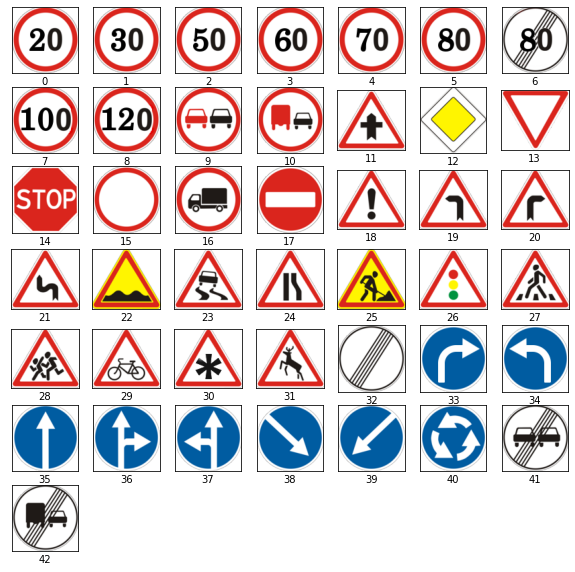

In [4]:
dir = '/content/drive/MyDrive/GoogleCollabWork/Traffic1'  
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

####shuffling data

In [5]:
#shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

###Splitting training and testing dataset

In [7]:
#Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)#, shuffle=True)

# X_train = X_train/255 
# X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 64, 64, 3)
X_valid.shape (7842, 64, 64, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, total_classes)
y_valid = tensorflow.keras.utils.to_categorical(y_valid, total_classes)
print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [11]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(input_shape = (64, 64, 3), include_top = False, weights = 'imagenet')

16711680/16705208 [==============================] - 0s 0us/step


In [12]:
# Untraining existing weights
for layer in model.layers:
    layer.trainable = False

In [16]:
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(y_train.shape[1], activation="softmax")(x)
model_final = Model(model.input, predictions)

In [18]:
model_final.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate= 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
eff_history = model_final.fit(x=X_train,y=y_train,batch_size=64, validation_data =(X_valid, y_valid), steps_per_epoch = 100, epochs = 15)


Epoch 1/15
100/100 [==============================] - 68s 625ms/step - loss: 0.1378 - accuracy: 0.1939 - val_loss: 0.0660 - val_accuracy: 0.4883
Epoch 2/15
100/100 [==============================] - 60s 605ms/step - loss: 0.0727 - accuracy: 0.4164 - val_loss: 0.0528 - val_accuracy: 0.5936
Epoch 3/15
100/100 [==============================] - 61s 611ms/step - loss: 0.0610 - accuracy: 0.5089 - val_loss: 0.0460 - val_accuracy: 0.6509
Epoch 4/15
100/100 [==============================] - 60s 606ms/step - loss: 0.0551 - accuracy: 0.5552 - val_loss: 0.0413 - val_accuracy: 0.6853
Epoch 5/15
100/100 [==============================] - 60s 600ms/step - loss: 0.0505 - accuracy: 0.5909 - val_loss: 0.0388 - val_accuracy: 0.7068
Epoch 6/15
100/100 [==============================] - 61s 609ms/step - loss: 0.0451 - accuracy: 0.6531 - val_loss: 0.0354 - val_accuracy: 0.7414
Epoch 7/15
100/100 [==============================] - 60s 600ms/step - loss: 0.0426 - accuracy: 0.6741 - val_loss: 0.0332 - val_ac

### Save the Model

In [ ]:
model_final.save("traffic_classifier.h5")

###PLOT THE GRAPHS

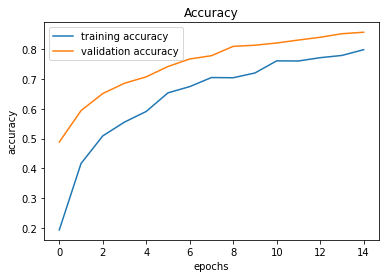

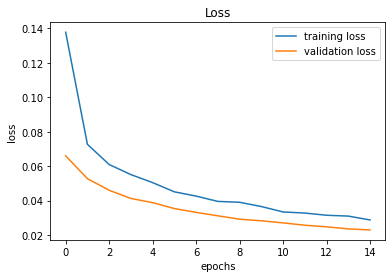

In [32]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(eff_history.history['accuracy'], label='training accuracy')
plt.plot(eff_history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(eff_history.history['loss'], label='training loss')
plt.plot(eff_history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


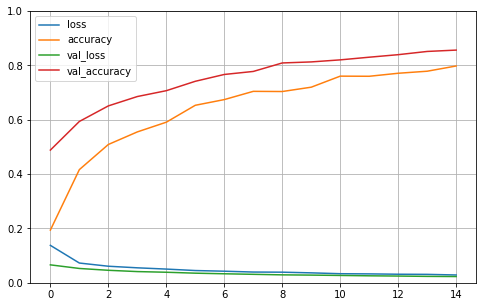

In [34]:
pd.DataFrame(eff_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

### Dictionary to Label all the Classes

In [59]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

###TESTING ACCURACY ON TEST DATASET

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

test = pd.read_csv('/content/drive/MyDrive/GoogleCollabWork/Traffic1/Test.csv')
#print(test["ClassId"].values)
print(test["Path"].values)
labels = test["ClassId"].values
imgs = test["Path"].values
print(imgs)
data=[]
for img in imgs:
    image = Image.open((img))
    image = image.resize((30,30))
    data.append(np.array(image))
  
X_valid=np.array(data)
pred = model_final.predict_classes(X_valid)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

##GUI for the App.

In [ ]:
!pip install tk

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

#Load the Model
model = load_model('traffic_classifier.h5')

#initialise GUI
top=tk.Tk(screenName=Hey)
top.geometry('800x600')
top.title('Traffic Sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model_final.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

#COMPARING WITH VGG

In [88]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [89]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

In [90]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))



add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001
def results(model):
  adam = Adam(lr=learning_rate)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


###Testing accuracy on test dataset

#FLASK DEPLOYMENT

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"
    
app.run()